In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from helper import plot_cost_history, split_data, normalize, compute_loss, plot_features_to_value
import params   

In this file we aim to calculate several analytical solution to the linear regression problem for this data:


In [67]:
# Load the data
data = pd.read_csv('dane.data', sep='\t', header=None)
print(data)
X = data.iloc[:, 0:6]
X = normalize(X)
y = data.iloc[:, 6]
X_ext = np.column_stack((np.ones(len(X)), X))
X_transpose = np.transpose(X)
X_ext_transpose = np.transpose(X_ext)

# print(X)
X = X.to_numpy()

       0   1  2  3  4   5       6
0     13  30  2 -9  4  -2  235.53
1     13  55  2 -4 -2  -4  330.16
2     13  57  2  0 -2  -1  355.29
3     13  57  2  6  1   9  190.74
4     13  44  2  8 -5  -6  567.06
...   ..  .. .. .. ..  ..     ...
1994  59  32  7 -2 -3   1  506.64
1995  59  40  7  3 -2  -5  383.56
1996  59  34  7  5 -2   4  520.09
1997  59  32  7  6 -3 -10  275.48
1998  59  42  7  9  0   2  714.25

[1999 rows x 7 columns]


In [68]:
# calculating the analytical solution -> theta = (X^T * X)^-1 * X^T * y
def analytical_solution(X, y):
    X_transpose = np.transpose(X)
    return np.linalg.pinv(X_transpose.dot(X)).dot(X_transpose).dot(y)


In [69]:
# function for calculating the analytical solution -> theta = (X^T * X + λ *I)^-1 * X^T * y
def analytical_solution_ridge(X, y, lambda_):
    X_transpose = np.transpose(X)
    I = np.identity(X.shape[1])
    theta = np.linalg.inv(X_transpose.dot(X) + I * lambda_).dot(X_transpose).dot(y)
    return theta

In [70]:
# testing the analytical solution

# split the data into training and test set
avg_theta = np.zeros(X_ext.shape[1])
avg_loss = 0
for i in range(0, 100):
    X_train, X_test, y_train, y_test = split_data(X_ext, y, 0.5)
    theta = analytical_solution(X_train, y_train)
    avg_loss += compute_loss(y_test, X_test.dot(theta))
    avg_theta += theta
    
print("Average loss: ", avg_loss/100)
print("Average theta: ", avg_theta/100)

Average loss:  130548.31133850565
Average theta:  [ 731.15409271 -360.95515689   41.94451523  -38.2038857   -10.61420685
  -71.72306158 -127.00231501]


In [71]:
# testing the analytical solution for ridge regression
lambdas = [0.00000001, 0.5, 1, 5, 10, 100, 1000, 10000, 100000]

# split the data into training and test set
avg_loss = np.zeros(9)
for i in range(0, 100):
    X_train, X_test, y_train, y_test = split_data(X_ext, y, 0.1)
    for j in range(0, 9):
        theta = analytical_solution_ridge(X_train, y_train, lambdas[j])
        avg_loss[j] += compute_loss(y_test, X_test.dot(theta))
    
print("Average loss: ", avg_loss/100)

Average loss:  [133731.35023832 133678.31983856 133772.9877816  136283.23061888
 139526.20123545 156711.44511915 237424.36845513 325758.09236457
 341724.01039766]


In [72]:

for lambda_ in lambdas:
    theta = analytical_solution_ridge(X_ext, y, lambda_)
    print("Lambda: ", lambda_, "Loss: ", compute_loss(y, X_ext.dot(theta)))
    print("Average loss: ", compute_loss(y, X_ext.dot(theta)))

Lambda:  1e-08 Loss:  128950.56685012605
Average loss:  128950.56685012605
Lambda:  0.5 Loss:  128951.53763171168
Average loss:  128951.53763171168
Lambda:  1 Loss:  128954.39949105262
Average loss:  128954.39949105262
Lambda:  5 Loss:  129037.13162062166
Average loss:  129037.13162062166
Lambda:  10 Loss:  129257.77551238229
Average loss:  129257.77551238229
Lambda:  100 Loss:  136512.40806341916
Average loss:  136512.40806341916
Lambda:  1000 Loss:  156024.51862337365
Average loss:  156024.51862337365
Lambda:  10000 Loss:  237484.6963057976
Average loss:  237484.6963057976
Lambda:  100000 Loss:  325850.8848751864
Average loss:  325850.8848751864


In [73]:
# Modifying X as in main file



# create more complex features
new_params = np.zeros(X.shape[0])

for i in range(X.shape[1]):
    for j in [4,8,2]:
        # add sin and cos of each feature
       new_params = np.c_[new_params, np.sin(j * X[:, i]*np.pi)/2 + 1/2, np.cos(j * X[:, i]*np.pi)/2 + 1/2]
    
X = np.c_[X, new_params]

new_params = np.zeros(X.shape[0])   

for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        new_params = np.c_[new_params, X[:, i] * X[:, j]]
        
X = np.c_[X, new_params]




# X = X_copy
X = np.c_[np.ones(X.shape[0]), X]
print("number of parameters: ", X.shape[1])

number of parameters:  948


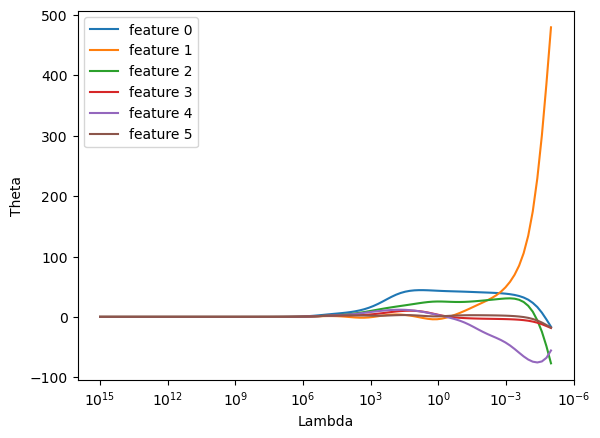

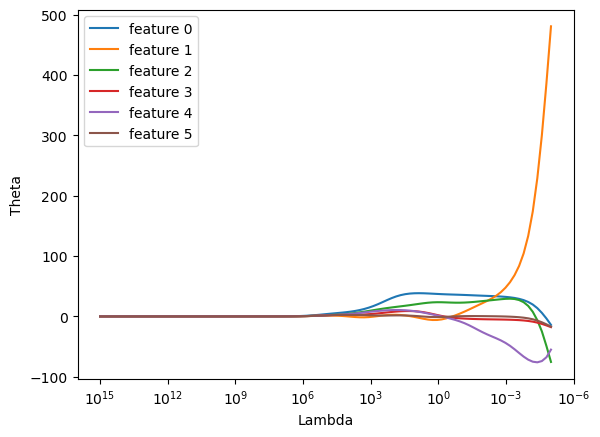

In [74]:
#plotting ridge regression over lambda -> each line represents a different feature
# reverse the x axis


labdas = np.logspace(-5, 15, 100)

for i in range(0, 6):
    theta = []
    for labda in labdas:
        theta.append(analytical_solution_ridge(X, y, labda)[i])
    plt.plot(labdas, theta, label=f'feature {i}')
plt.xlabel('Lambda')
plt.ylabel('Theta')
plt.xscale('log')
plt.legend()
plt.gca().invert_xaxis()
plt.show()


X_ext = np.column_stack((np.ones(len(X)), X))
# what will happen if we add an intercept term to the data? (might be silly, but let's see)
for i in range(1, 7):
    theta = []
    for labda in labdas:
        theta.append(analytical_solution_ridge(X_ext, y, labda)[i])
    plt.plot(labdas, theta, label=f'feature {i-1}')
plt.xlabel('Lambda')
plt.ylabel('Theta')
plt.xscale('log')
plt.legend()
plt.gca().invert_xaxis()
plt.show()
    